In [429]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [430]:
# Initialise data
cols = ["Date", "Adj_Close"]
df = pd.read_csv("MSFT.csv").drop(["Open","High","Low","Volume", "Close"], axis = 1)
df.columns = cols
print(df.head())

         Date  Adj_Close
0  1986-03-13   0.060055
1  1986-03-14   0.062199
2  1986-03-17   0.063272
3  1986-03-18   0.061663
4  1986-03-19   0.060591


Shape of data frame: (9651, 2)


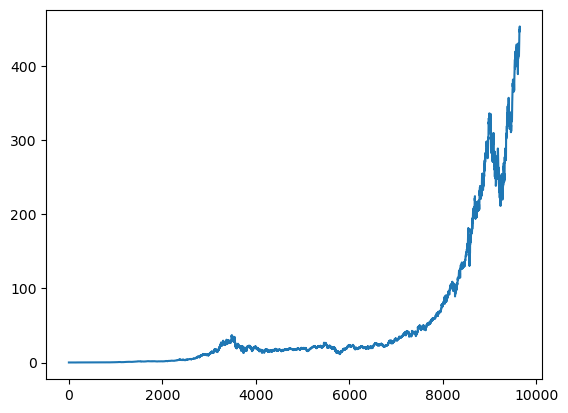

In [470]:
# Test Data
plt.plot(df["Adj_Close"])
print("Shape of data frame:", df.shape)

In [505]:
# Randomise Seed
tf.random.set_seed(7)
# Initialise training and test sets
prices = df["Adj_Close"].values

scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices.reshape(-1,1))

train_size = int(len(prices) * 0.8)
train = prices[:train_size]
test = prices[train_size:]
print(train_size)

7720


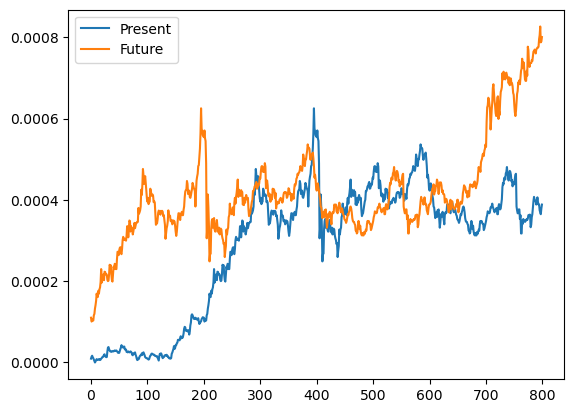

In [574]:
#Create X and Y datasets for train and test
def dataset(data):
    X_data = data[:-200]
    Y_data = data[200:]
    return (X_data, Y_data)

(X_train, Y_train) = dataset(train)
(X_test, Y_test) = dataset(test)

X_train.reshape(len(X_train),1,1)
Y_train.reshape(len(X_train),1,1)
X_test.reshape(len(X_test),1,1)
Y_test.reshape(len(X_test),1,1)

plt.plot(X_train[:800], label = "Present")
plt.plot(Y_train[:800], label = "Future")
plt.legend()
plt.show()


In [575]:
# Define Model
nn_model = tf.keras.Sequential([
tf.keras.layers.LSTM(units = 100, input_shape = (100,1), return_sequences=True),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.LSTM(units = 100, return_sequences=False),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1)
])
nn_model.build()
print(nn_model.summary())

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_139 (LSTM)             (None, 100, 100)          40800     
                                                                 
 dropout_81 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_140 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_82 (Dropout)        (None, 100)               0         
                                                                 
 dense_68 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


2024-07-01 17:54:53.232053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 17:54:53.232869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 17:54:53.233349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [576]:
#train
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


2024-07-01 17:54:58.358699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 17:54:58.360714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 17:54:58.362170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

235/235 - 3s - loss: 3.2207e-04 - 3s/epoch - 14ms/step
Epoch 2/100
235/235 - 0s - loss: 8.9882e-05 - 266ms/epoch - 1ms/step
Epoch 3/100
235/235 - 0s - loss: 9.2122e-05 - 474ms/epoch - 2ms/step
Epoch 4/100
235/235 - 0s - loss: 8.8709e-05 - 246ms/epoch - 1ms/step
Epoch 5/100
235/235 - 0s - loss: 9.0228e-05 - 244ms/epoch - 1ms/step
Epoch 6/100
235/235 - 0s - loss: 8.9186e-05 - 257ms/epoch - 1ms/step
Epoch 7/100
235/235 - 0s - loss: 8.8271e-05 - 256ms/epoch - 1ms/step
Epoch 8/100
235/235 - 0s - loss: 8.9261e-05 - 248ms/epoch - 1ms/step
Epoch 9/100
235/235 - 0s - loss: 8.9714e-05 - 246ms/epoch - 1ms/step
Epoch 10/100
235/235 - 0s - loss: 8.7656e-05 - 251ms/epoch - 1ms/step
Epoch 11/100
235/235 - 0s - loss: 8.6693e-05 - 244ms/epoch - 1ms/step
Epoch 12/100
235/235 - 0s - loss: 8.7547e-05 - 243ms/epoch - 1ms/step
Epoch 13/100
235/235 - 0s - loss: 8.8269e-05 - 256ms/epoch - 1ms/step
Epoch 14/100
235/235 - 0s - loss: 8.6273e-05 - 245ms/epoch - 1ms/step
Epoch 15/100
235/235 - 0s - loss: 8.8060e-0

In [571]:
train_pred = nn_model.predict(X_train)
test_pred = nn_model.predict(X_test)

# invert predictions
#train_pred = scaler.inverse_transform(train_pred)
#Y_train = scaler.inverse_transform(Y_train)
#test_pred = scaler.inverse_transform(test_pred)
#Y_test = scaler.inverse_transform(Y_test)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(Y_train, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(Y_test, test_pred))
print('Test Score: %.2f RMSE' % (testScore))



2024-07-01 17:54:05.567232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 17:54:05.568894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 17:54:05.569870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

235/235 [==============================] - 1s 516us/step


2024-07-01 17:54:06.180071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 17:54:06.180777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 17:54:06.181500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

55/55 [==============================] - 0s 579us/step
Train Score: 0.01 RMSE
Test Score: 0.29 RMSE


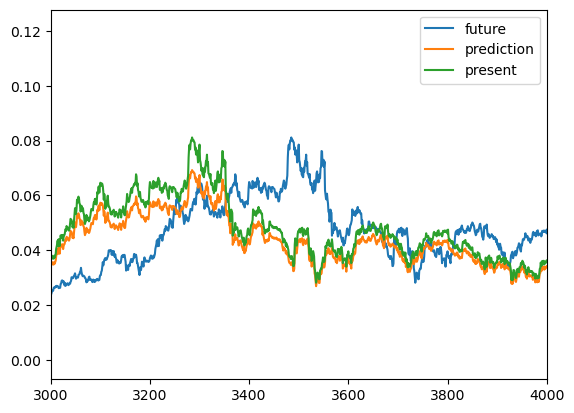

In [572]:
plt.plot(Y_train, label = "future")
plt.plot(train_pred, label = "prediction")
plt.plot(X_train, label = "present")
plt.xlim(3000,4000)
plt.legend()
plt.show()


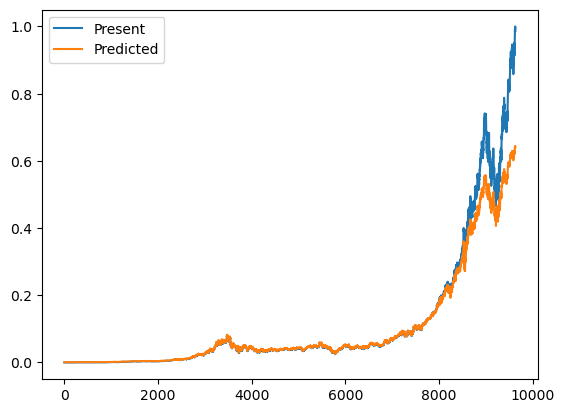

In [565]:
plt.plot(np.concatenate((X_train, X_test)), label="Present")
plt.plot(np.concatenate((train_pred, test_pred)), label="Predicted")
plt.legend()
plt.show()

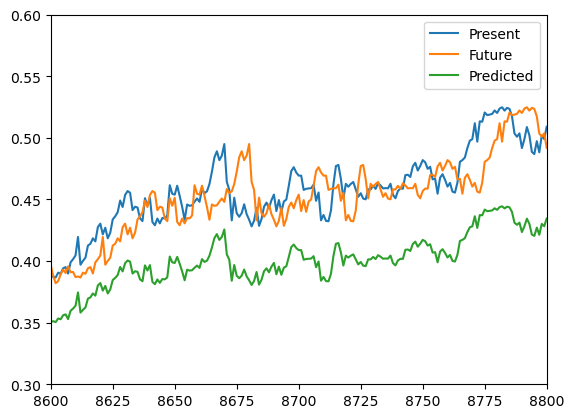

In [566]:
# Plot prediction

start = 8600
width = 200
plt.plot(np.concatenate((X_train, X_test)), label="Present")
plt.plot(np.concatenate((Y_train, Y_test)), label="Future")
plt.plot(np.concatenate((train_pred, test_pred)), label="Predicted")
plt.legend()
plt.xlim(start,start+width)
plt.ylim(0.3,0.6)
plt.show()

In [567]:
# Forecast
X = Y_train
for i in range(100):
    prediction = nn_model.predict(X)
    X = np.append(X, prediction[-1][0])
    X = X.reshape(len(X), 1)
    print(i)

# Plot Forcast
plt.plot(np.concatenate((Y_train, Y_test)))
plt.plot(X_train)
plt.plot(X)
plt.show()

241/241 [==============================] - 0s 829us/step
0
241/241 [==============================] - 0s 442us/step
1
241/241 [==============================] - 0s 485us/step
2
242/242 [==============================] - 0s 451us/step
3
242/242 [==============================] - 0s 449us/step
4
242/242 [==============================] - 0s 472us/step
5
242/242 [==============================] - 0s 448us/step
6
242/242 [==============================] - 0s 446us/step
7
242/242 [==============================] - 0s 511us/step
8
242/242 [==============================] - 0s 446us/step
9
242/242 [==============================] - 0s 447us/step
10
242/242 [==============================] - 0s 444us/step
11
242/242 [==============================] - 0s 438us/step
12
242/242 [==============================] - 0s 450us/step
13
242/242 [==============================] - 0s 438us/step
14
242/242 [==============================] - 0s 446us/step
15
242/242 [==============================] - 0s 657u

KeyboardInterrupt: 